# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

<module 'matplotlib.pyplot' from '/Users/kirillushkov/Documents/projects/computer-vision/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

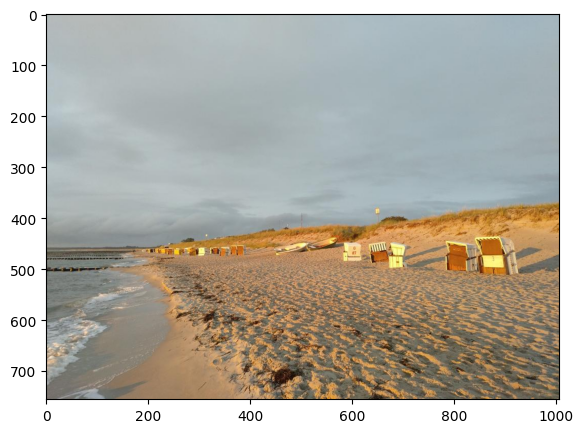

In [5]:
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x13b324f50>)

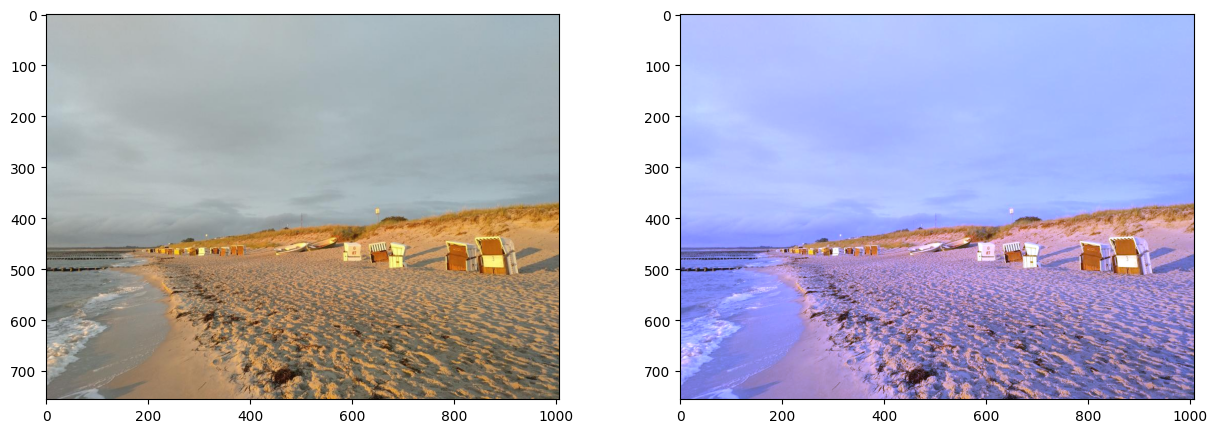

In [6]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

means [118.63003545168067, 85.357681197479, 43.60942095588236]
total mean 82.53237920168067
max value = 118.63003545168067
coefs 0.6957123369932484, 1.3897991813674568, 2.7202845818955774


(<Axes: >, <matplotlib.image.AxesImage at 0x2dad22810>)

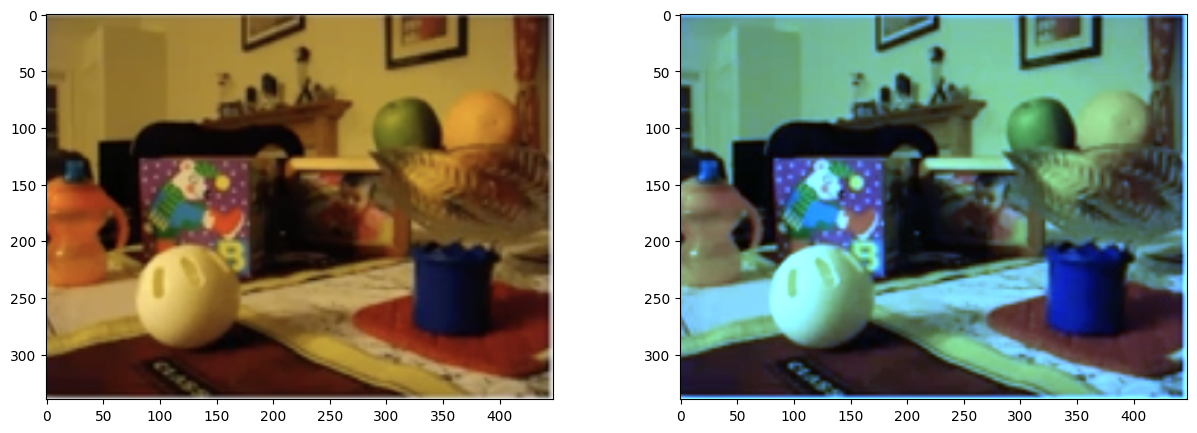

In [117]:
# Load your image
img = cv2.imread('data/yellow_light.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red, green, blue = cv2.split(img)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(red)
mean_g = np.mean(green)
mean_b = np.mean(blue)

means = [mean_r, mean_g, mean_b]
print(f"means {means}")
mean_total = np.mean(img)
print(f"total mean {mean_total}")
max_val = np.max(means)
print(f"max value = {max_val}")

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

fixed_value = mean_total / max_val

kr = fixed_value if max_val == mean_r else max_val / mean_r
kg = fixed_value if max_val == mean_g else max_val / mean_g
kb = fixed_value if max_val == mean_b else max_val / mean_b

print(f"coefs {kr}, {kg}, {kb}")

coeffs = [kr, kg, kb]

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

balanced = balanced/255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Axes: >, <matplotlib.image.AxesImage at 0x2e4fb3fd0>)

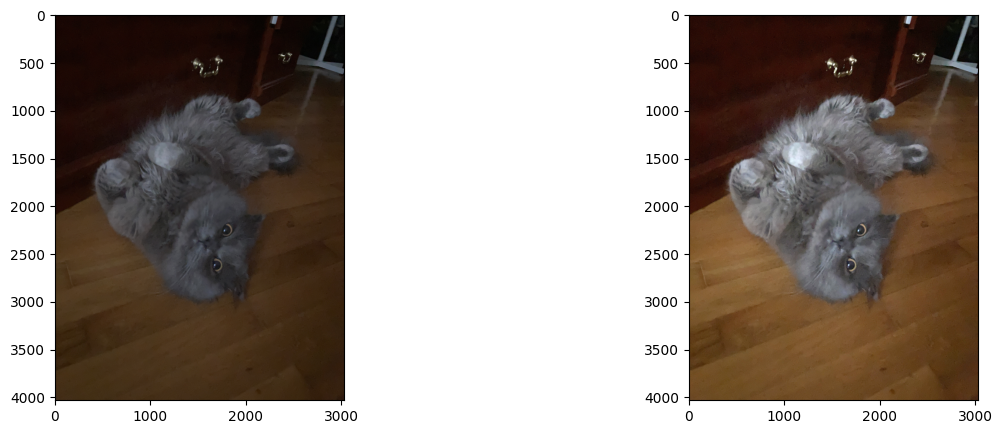

In [116]:
# Load your image
img = cv2.imread('data/martin_cat3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red, green, blue = cv2.split(img)

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] / np.max(img[channel])

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)